In [38]:
import copy
import json
import logging
import pickle
import time
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def load_indexes(filename):
        save_dir = os.path.join(os.getcwd(), f"indexes_results/{filename}")
        with open(os.path.join(save_dir, save_dir), "rb") as file:
            indexes = list(pickle.load(file))

        return indexes

# Create budget plots

In [48]:
indexes = load_indexes("epinions.pickle")
print(indexes[0])

['drop', {'budget_MB': 10000, 'max_index_width': 2, 'max_indexes': 4}, 187054.6400000093, {I(C review.i_id), I(C review.u_id), I(C trust.source_u_id), I(C useracct.u_id)}, 32.2, 3677.39168916968]


In [49]:
indexes = [[a, b["max_indexes"], c, d, e, f] for a, b, c, d, e, f in indexes] # Extract max_indexes param

In [51]:
df = pd.DataFrame(indexes, columns=["algo_name", "max_indexes", "cost", "indexes", "calc_time", "goodput"])[:24]
df.head(25)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,drop,4,187054.64,"{I(C review.i_id), I(C review.u_id), I(C trust...",32.20,3677.391689
1,drop,6,146003.61,"{I(C review.i_id), I(C item.i_id), I(C useracc...",27.53,3809.246337
2,drop,8,145930.66,"{I(C review.i_id), I(C item.i_id), I(C useracc...",25.44,2960.501457
3,drop,10,144784.59,"{I(C review.i_id), I(C item.i_id), I(C useracc...",20.54,2994.609651
4,drop,15,141781.43,"{I(C review.i_id), I(C item.i_id), I(C useracc...",12.12,2967.369107
5,extend,4,134242.20,"[I(C useracct.u_id), I(C item.i_id), I(C trust...",64.47,3890.131783
6,extend,6,135929.03,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",65.78,3912.634851
7,extend,8,133254.49,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",62.10,3936.999675
8,extend,10,138732.28,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",65.07,3916.323683
9,extend,15,134815.61,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",64.81,3572.250795


In [52]:
# Normalize fields
df[["cost", "calc_time", "goodput"]] = df[["cost", "calc_time", "goodput"]].transform(lambda x: (x - x.mean()) / x.std())
df.head(10)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,drop,4,3.361143,"{I(C review.i_id), I(C review.u_id), I(C trust...",-0.439098,0.113810
1,drop,6,0.472166,"{I(C review.i_id), I(C item.i_id), I(C useracc...",-0.551762,0.583277
2,drop,8,0.467032,"{I(C review.i_id), I(C item.i_id), I(C useracc...",-0.602184,-2.438666
3,drop,10,0.386377,"{I(C review.i_id), I(C item.i_id), I(C useracc...",-0.720397,-2.317224
4,drop,15,0.175029,"{I(C review.i_id), I(C item.i_id), I(C useracc...",-0.923531,-2.414214
5,extend,4,-0.355546,"[I(C useracct.u_id), I(C item.i_id), I(C trust...",0.339421,0.871268
6,extend,6,-0.236835,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",0.371025,0.951390
7,extend,8,-0.425057,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",0.282244,1.038140
8,extend,10,-0.039556,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",0.353896,0.964524
9,extend,15,-0.315192,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",0.347623,-0.260542


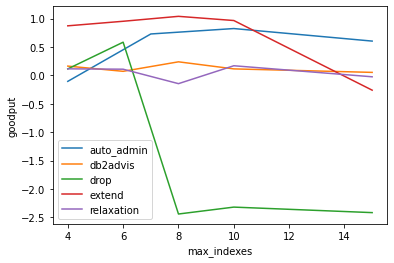

In [57]:
# goodput VS. max_index
df2 = df.set_index('max_indexes')
df2.groupby('algo_name')["goodput"].plot(legend=True)
plt.ylabel('goodput')
plt.savefig('./graphs/epinions_goodput.png')

algo_name
db2advis      AxesSubplot(0.125,0.125;0.775x0.755)
extend        AxesSubplot(0.125,0.125;0.775x0.755)
relaxation    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

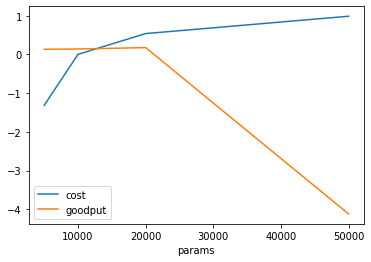

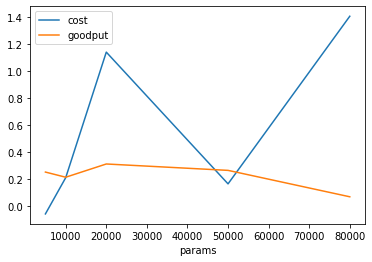

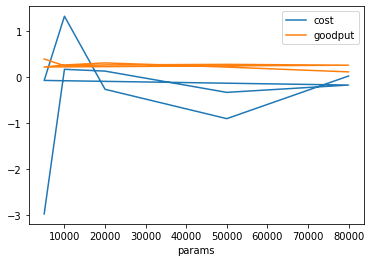

In [37]:
# goodput vs. calc_time
df2 = df.set_index('max_indexes')
df2.groupby('algo_name')["calc_time"].plot(legend=True)
plt.ylabel('goodput')
plt.savefig('./graphs/epinions_goodput.png')